In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *

In [2]:
data='/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images'

In [3]:
image_classes = os.listdir('/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images')
image_classes

['Uninfected', 'Parasitized']

In [4]:
def plot_image(image_classes):
    plt.figure(figsize = (14,14))
    for i, category in enumerate(image_classes):
        image_path = data + '/' + category
        images_in_folder = os.listdir(image_path)

        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image

        #load image
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255

        plt.subplot(4, 4, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

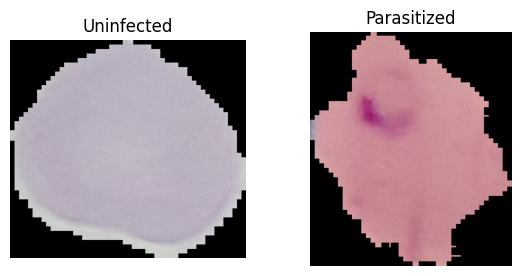

In [5]:
plot_image(image_classes)

In [6]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_directory(
    data,
    subset='training',
    shuffle = True,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = datagen.flow_from_directory(
    data,
    subset='validation',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,690 (72.61 MB)

 Trainable params: 19,034,690 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [10]:
model_history = model.fit(train_generator,
                         epochs = 5,
                         validation_data = val_generator)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724673590.084286     121 service.cc:145] XLA service 0x7d8cfc005230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724673590.084339     121 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/689 ━━━━━━━━━━━━━━━━━━━━ 1:16:38 7s/step - accuracy: 0.6250 - loss: 0.6698

I0000 00:00:1724673593.452844     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


689/689 ━━━━━━━━━━━━━━━━━━━━ 206s 289ms/step - accuracy: 0.5898 - loss: 0.7637 - val_accuracy: 0.9328 - val_loss: 0.2084
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.9341 - loss: 0.2038 - val_accuracy: 0.9401 - val_loss: 0.1664
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.9562 - loss: 0.1366 - val_accuracy: 0.9446 - val_loss: 0.1561
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.9638 - loss: 0.1066 - val_accuracy: 0.9479 - val_loss: 0.1736
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.9733 - loss: 0.0817 - val_accuracy: 0.9408 - val_loss: 0.1711


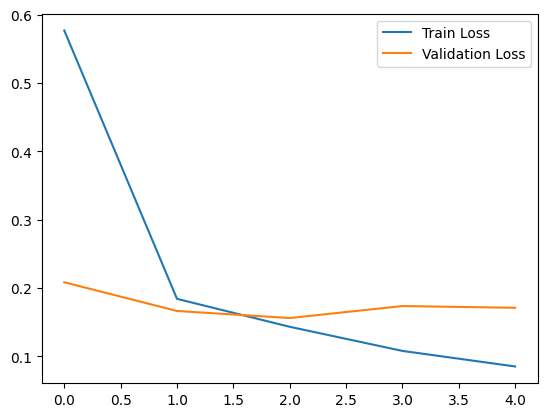

In [11]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

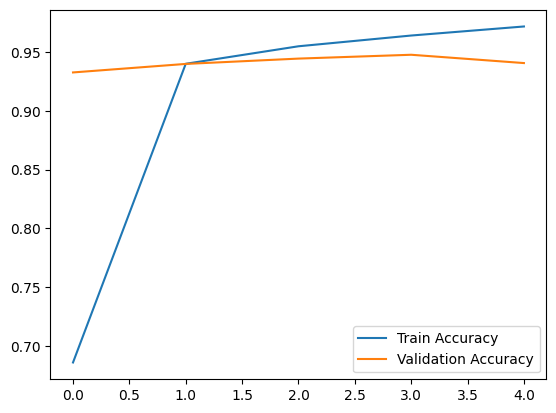

In [12]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [13]:
model.evaluate(val_generator)

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9390 - loss: 0.1702


[0.17111998796463013, 0.9408348202705383]

In [14]:
model.evaluate(train_generator)

689/689 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.9816 - loss: 0.0550


[0.057489119470119476, 0.9810867309570312]

In [15]:
model.save('Malria_model.h5')

In [16]:
class_map = dict([value, key] for key, value in train_generator.class_indices.items())
print(class_map)

{0: 'Parasitized', 1: 'Uninfected'}
